Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Număr de clase unice: 7
Epoch 1/25
359/359 [==============================] - 110s 304ms/step - loss: 1.7727 - accuracy: 0.2703 - val_loss: 1.6300 - val_accuracy: 0.3483
Epoch 2/25
359/359 [==============================] - 104s 290ms/step - loss: 1.6057 - accuracy: 0.3666 - val_loss: 1.5183 - val_accuracy: 0.4262
Epoch 3/25
359/359 [==============================] - 109s 304ms/step - loss: 1.4953 - accuracy: 0.4176 - val_loss: 1.4197 - val_accuracy: 0.4559
Epoch 4/25
359/359 [==============================] - 104s 289ms/step - loss: 1.4265 - accuracy: 0.4476 - val_loss: 1.3687 - val_accuracy: 0.4756
Epoch 5/25
359/359 [==============================] - 109s 303ms/step - loss: 1.3739 - accuracy: 0.4690 - val_loss: 1.3569 - val_accuracy: 0.4913
Epoch 6/25
359/359 [==============================] - 104s 290ms/step - loss: 1.3282 - accuracy: 0.4875 - val_loss: 1

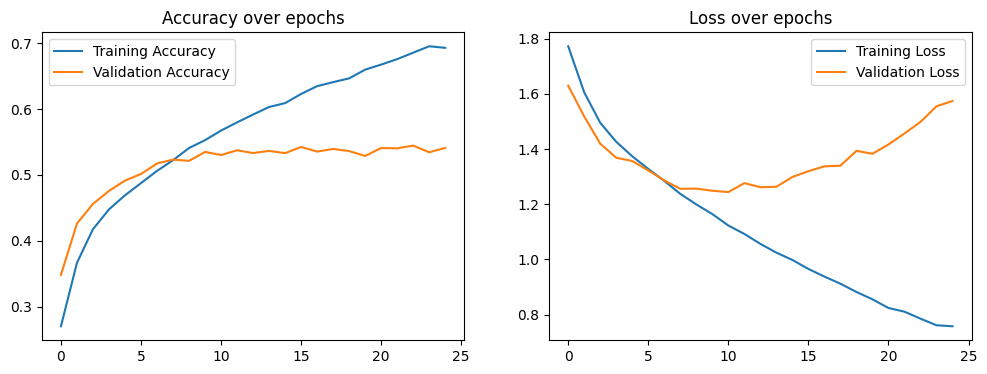

225/225 [==============================] - 11s 47ms/step - loss: 1.5151 - accuracy: 0.5554
Final test accuracy: 0.5554472208023071
Modelul a fost salvat cu succes.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
# Importarea librariilor

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import drive

# Montarea Google Drive pentru acces mai usor

drive.mount('/content/drive')

# Funtia pentru incarcarea dataset-ului

def load_dataset(directory):
    images = []
    labels = []
    for label_folder in os.listdir(directory):
        label_dir = os.path.join(directory, label_folder)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, file)
                img = load_img(img_path)
                img = img_to_array(img)
                img /= 255.0
                images.append(img)
                labels.append(label_folder)
    return np.array(images), np.array(labels)

# Incarcarea setului de date
path_to_train = '/content/drive/My Drive/train' # Calea catre setul de date de antrenare
path_to_test = '/content/drive/My Drive/test' # Calea catre setul de date de testare

train_images, train_labels = load_dataset(path_to_train)
test_images, test_labels = load_dataset(path_to_test)

# Combinarea etichetelor de antrenare si testare

all_labels = np.concatenate([train_labels, test_labels])

# Codificarea etichetelor în format numeric

label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

# Determinarea numarului de clase unice

num_classes = len(np.unique(all_labels_encoded))
print("Număr de clase unice:", num_classes)

# Separarea etichetelor înapoi în seturile de antrenare si testare

train_labels_encoded = all_labels_encoded[:len(train_labels)]
test_labels_encoded = all_labels_encoded[len(train_labels):]

# Convertirea etichetelor codificate în format one-hot

train_labels_one_hot = to_categorical(train_labels_encoded, num_classes=num_classes)
test_labels_one_hot = to_categorical(test_labels_encoded, num_classes=num_classes)

# Impartirea setului de date de antrenare în subseturi de antrenare si validare

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels_one_hot, test_size=0.2, random_state=42)

# Definirea modelului CNN

model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compilarea modelului

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Antrenarea modelului

history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Evaluarea modelului pe setul de date de test

test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=1)
print('Test accuracy:', test_accuracy)

# Vizualizarea curbelor de antrenare pentru acuratete si pierdere

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

# Evaluarea finala a modelului pe setul de date de test
final_test_loss, final_test_accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=1)
print('Final test accuracy:', final_test_accuracy)

# Salvarea modelului antrenat
model.save('/content/drive/My Drive/emotion_detection_model.h5')
print('Modelul a fost salvat cu succes.')

# Modelul va fi salvat in google drive si poate fi apelat dupa in alte proiecte sau intr-o aplicatie
